# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 2.1 Plot $y = -3x^2 + 72x + 70$.

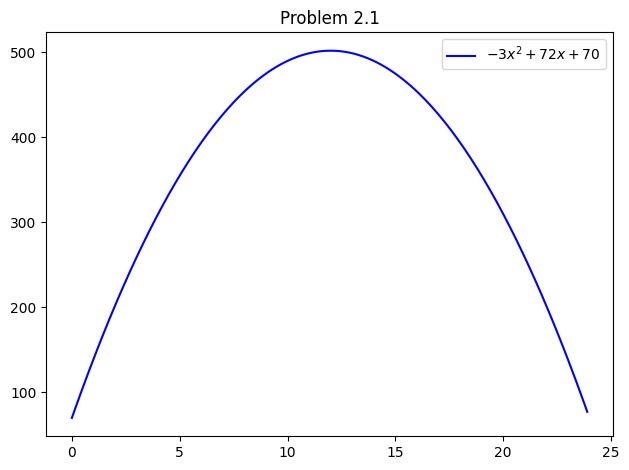

In [13]:
# define x range
x = np.arange(0,24, 0.1)

# define y 
y = -3 * (x**2) + 72*x + 70

# plot

plt.figure()
plt.plot(x,y, color = "blue", label = r"$-3x^2 + 72x + 70$")
plt.title("Problem 2.1")
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()


## 2.3 Plot $f(x_1, x_2)$.

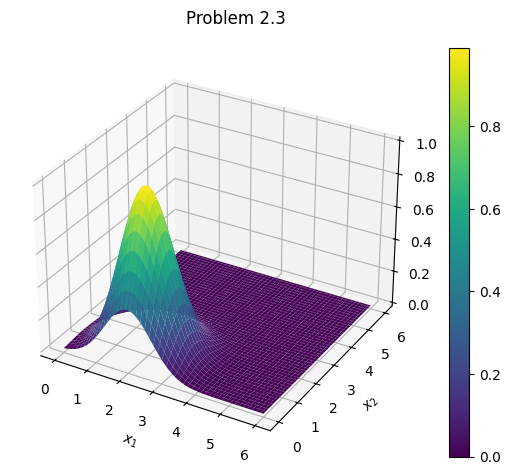

In [15]:
# define x and y plane 
xs = np.linspace(start=0.0, stop=6.0, num=1001)
ys = np.linspace(start=0.0, stop=6.0, num=1001)

xx, yy = np.meshgrid(xs, ys)

zz = np.exp(-((xx - 2)**2)-((yy - 1)**2))

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection' : '3d'})
im = ax.plot_surface(X=xx, Y=yy, Z=zz, cmap='viridis')

fig.colorbar(im)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")

plt.suptitle("Problem 2.3")
plt.tight_layout()
plt.show()





## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

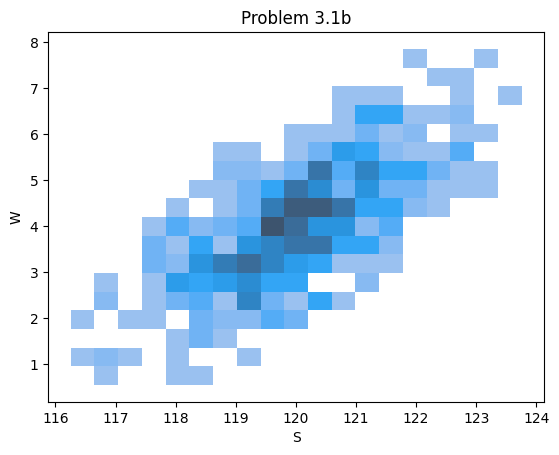

(np.float64(120.0260541264129), np.float64(4.0195518362191915))

In [24]:
# mean vector for our MVN
mu = np.array([120, 4])

# the covariance matrix 
Sigma = np.array([[1.5, 1], [1, 1.5]])

# Sample values of S and W
rv = mvn(mean=mu, cov=Sigma)
samples = rv.rvs(size=500)
S_samples, W_samples = samples[:, 0], samples[:, 1]

# Plot the histogram
plt.figure()
sns.histplot(x=S_samples, y=W_samples)
plt.xlabel("S")
plt.ylabel("W")
plt.title("Problem 3.1b")
plt.show()

# Compute empirical means
S_mean = np.mean(S_samples)
W_mean = np.mean(W_samples)

S_mean, W_mean



## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

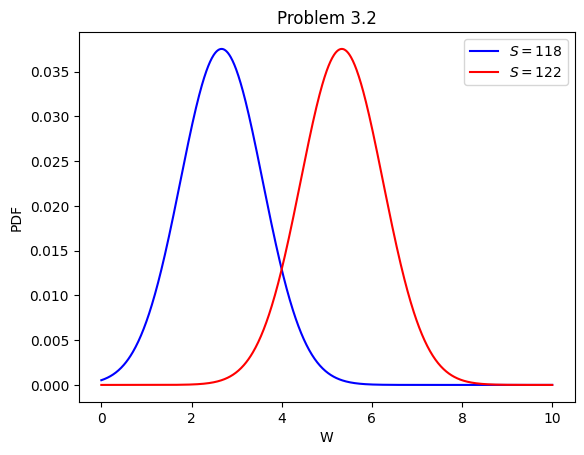

In [27]:
# mean vector for our MVN
mu = np.array([120, 4])

# the covariance matrix 
Sigma = np.array([[1.5, 1], [1, 1.5]])

W = np.linspace(0, 10, 1001)

rv_122 = mvn(mean=mu, cov=Sigma)
pdf_122 = np.array([rv.pdf([122, w]) for w in W])

rv_118 = mvn(mean=mu, cov=Sigma)
pdf_118 = np.array([rv.pdf([118, w]) for w in W])

# plot the PDFs
plt.figure()
plt.plot(W, pdf_118, label=r'$S=118$', color='blue')
plt.plot(W, pdf_122, label=r'$S=122$', color='red')
plt.xlabel("W")
plt.ylabel("PDF")
plt.title("Problem 3.2")
plt.legend()
plt.tight_layout
plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [28]:
from scipy.stats import poisson as psn

def sample_t_star():
    # compute n as described
    N = sum(psn.rvs(mu=3, size=24))

    # processing times for n packages
    if N > 0:
        S_W_samples = mvn(mean=mu, cov=Sigma).rvs(size=N) 
        S_samples, W_samples = S_W_samples[:, 0], S_W_samples[:, 1]
        epsilon_samples = np.random.normal(0, np.sqrt(5), size=N)
        T_samples = 60 + 0.6 * W_samples + 0.2 * S_samples + epsilon_samples
        # t star formula
        T_star = np.sum(T_samples)
    else:
        T_star = 0

    return T_star



## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [31]:
# sample 1000 draws from t star distribution
samples = []
for _ in range(1000):
    samples.append(sample_t_star())

samples = np.array(samples)

# empirical mean and standard deviation
empirical_mean_T_star_scipy = np.mean(samples)
empirical_std_T_star_scipy = np.std(samples)

# display results
empirical_mean_T_star_scipy, empirical_std_T_star_scipy

(np.float64(6261.858450806884), np.float64(749.267286044232))

# 4.1: Examining the Data

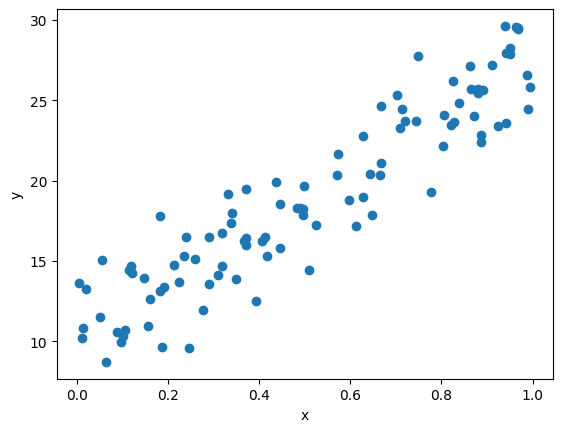

In [52]:
# Steve's solution
data = pd.read_csv("data/points.csv").values
x = data[:,0]
y = data[:,1]

fig, ax = plt.subplots()

plt.scatter(x,y,)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()


## 4.2: Adding the Intercept/Bias Term

In [62]:
# Steve's solution
intercept = np.ones((x.shape[0],1))
X = np.hstack([intercept,x.reshape(-1,1)]) # horizontally stack the ones and x coordinates next to each other
print(X.shape)
print(y.shape)


(100, 2)
(100,)


## 4.4: Implementing the LinearRegression Class

In [79]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        if self.w is None:
            print("Call fit first")
            return
        
        return X @ self.w

FileNotFoundError: [Errno 2] No such file or directory: 'img_output/hw0_p4_4.png'

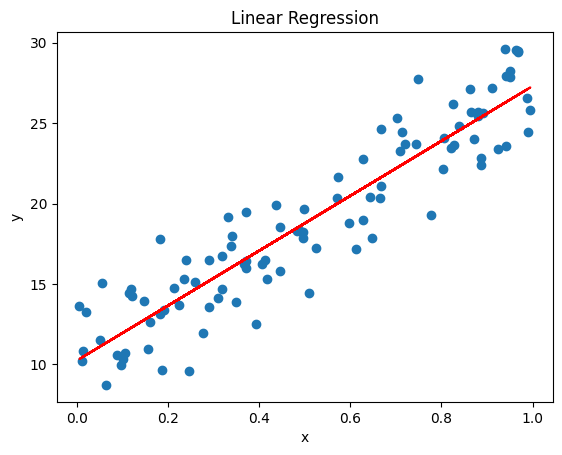

In [80]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [89]:
# Steve's solution

mse = np.mean(np.square(y - y_pred))

print(mse)

4.439331220193985
